<a href="https://colab.research.google.com/github/kyuwoncho/EDA/blob/main/Week13(%ED%8C%90%EB%8B%A4%EC%8A%A42)_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

## 결측데이터 생성

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=np.random.randn(5,3)
data
df=pd.DataFrame(data,columns=['C1','C2','C3'])
df

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,-0.344418,1.561265
3,0.559197,0.257785,1.375004
4,0.872625,0.938415,1.724342


## 결측 데이터를 특정 값으로 채우기

In [ ]:
#결측값은 누락된 값. 0과 다름.
#NULL 현재 알려지지 않은 값. 
df.loc[2,['C2']] = np.nan
df.loc[3,['C2']] = np.nan
df

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,NaN,1.561265
3,0.559197,NaN,1.375004
4,0.872625,0.938415,1.724342


In [ ]:
# 특정값으로 채우기
df.fillna(0)

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,0.000000,1.561265
3,0.559197,0.000000,1.375004
4,0.872625,0.938415,1.724342


## 결측 데이터를 평균으로 채우기

In [ ]:
#집계함수
df.mean()
df.fillna(df.mean())

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,-0.300918,1.561265
3,0.559197,-0.300918,1.375004
4,0.872625,0.938415,1.724342


In [ ]:
df.mean()
df3 = df.fillna(df.mean())
df3

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,-0.300918,1.561265
3,0.559197,-0.300918,1.375004
4,0.872625,0.938415,1.724342


In [ ]:
df

,C1,C2,C3
0,1.335326,-2.244082,0.563729
1,0.750576,0.402914,-0.617673
2,-0.993176,NaN,1.561265
3,0.559197,NaN,1.375004
4,0.872625,0.938415,1.724342


## 최빈값으로 채우기

In [ ]:
# 결측데이터 생성
area=['서울','강원','경기','인천','서울']
df=pd.DataFrame({'지역':area})
df.loc[1] = np.nan
df.loc[3] = np.nan
df

,지역
0,서울
1,NaN
2,경기
3,NaN
4,서울


In [ ]:
# 결측 데이터를 최빈값으로 채우기
# mode()
df['지역'].mode()
df=df.fillna(df['지역'].mode()[0])
df

,지역
0,서울
1,서울
2,경기
3,서울
4,서울


## 결측 데이터 처리 예
- [준비파일] : bank.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/bank.csv'
bank = pd.read_csv(path)

In [ ]:
# 결측 데이터 확인
bank

,job,education,balance,duration,y
0,management,tertiary,2143,261,no
1,technician,secondary,265,348,no
2,blue-collar,secondary,-7,365,no
3,technician,secondary,-3,1666,no
4,technician,secondary,-103,145,no
...,...,...,...,...,...
7229,services,secondary,199,173,no
7230,self-employed,tertiary,159,449,yes
7231,management,tertiary,138,162,no
7232,management,tertiary,1428,333,no


In [ ]:
bank.isnull()

,job,education,balance,duration,y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7229,False,False,False,False,False
7230,False,False,False,False,False
7231,False,False,False,False,False
7232,False,False,False,False,False


In [ ]:
bank.isnull().sum()

job           44
education    273
balance        0
duration       0
y              0
dtype: int64

In [ ]:
# 결측 데이터 행 삭제 후 확인
bank2 = bank.dropna()
bank2.isnull().sum()

job          0
education    0
balance      0
duration     0
y            0
dtype: int64

In [ ]:
# 결측 데이터 최빈값으로 대체
#job
m = bank['job'].mode()[0]
#갱신시키기-변수에 집어넣기
# bank = bank['job'].fillna(m)
#값만 주기 - 업데이트
bank['job'].fillna(m,inplace=True)
bank.isnull().sum()
#education

job            0
education    273
balance        0
duration       0
y              0
dtype: int64

# 데이터 가공 및 그룹핑

## 엑셀 불러오기
- [준비파일] : weather2020-2021.xlsx

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/week13_data/weather2020-2021.xlsx'
df = pd.read_excel(path)
df.head()

,날짜,평균기온,최저기온,최고기온
0,2020-01-01,-2.2,-6.5,0.3
1,2020-01-02,1.0,-0.7,3.8
2,2020-01-03,-0.1,-3.4,4.6
3,2020-01-04,1.2,-2.8,6.1
4,2020-01-05,1.3,-3.2,6.6


## 컬럼생성

In [ ]:
df['city']='서울'
df.head()

,날짜,평균기온,최저기온,최고기온,city
0,2020-01-01,-2.2,-6.5,0.3,서울
1,2020-01-02,1.0,-0.7,3.8,서울
2,2020-01-03,-0.1,-3.4,4.6,서울
3,2020-01-04,1.2,-2.8,6.1,서울
4,2020-01-05,1.3,-3.2,6.6,서울


## 컬럼 삭제 및 이름변경

In [ ]:
#평균기온컬럼을 삭제
df.drop(['평균기온'],axis=1,inplace=True)

In [ ]:
df

,날짜,최저기온,최고기온,city
0,2020-01-01,-6.5,0.3,서울
1,2020-01-02,-0.7,3.8,서울
2,2020-01-03,-3.4,4.6,서울
3,2020-01-04,-2.8,6.1,서울
4,2020-01-05,-3.2,6.6,서울
...,...,...,...,...
726,2021-12-27,-12.9,-3.9,서울
727,2021-12-28,-8.5,-0.9,서울
728,2021-12-29,-3.8,5.9,서울
729,2021-12-30,-6.8,0.2,서울


## 컬럼 이름 변경

In [ ]:
df.rename(index = {'city': '지역'}, inplace = True)

NameError: ignored

In [ ]:
df

,날짜,최저기온,최고기온,city
0,2020-01-01,-6.5,0.3,서울
1,2020-01-02,-0.7,3.8,서울
2,2020-01-03,-3.4,4.6,서울
3,2020-01-04,-2.8,6.1,서울
4,2020-01-05,-3.2,6.6,서울
...,...,...,...,...
726,2021-12-27,-12.9,-3.9,서울
727,2021-12-28,-8.5,-0.9,서울
728,2021-12-29,-3.8,5.9,서울
729,2021-12-30,-6.8,0.2,서울


## 날짜형식 데이터 추출

In [ ]:
# 데이터타입 조회
df.dtypes

날짜      datetime64[ns]
최저기온           float64
최고기온           float64
city            object
dtype: object

In [ ]:
df['년도']=df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day
df.head()

,날짜,최저기온,최고기온,city,년도,월,일
0,2020-01-01,-6.5,0.3,서울,2020,1,1
1,2020-01-02,-0.7,3.8,서울,2020,1,2
2,2020-01-03,-3.4,4.6,서울,2020,1,3
3,2020-01-04,-2.8,6.1,서울,2020,1,4
4,2020-01-05,-3.2,6.6,서울,2020,1,5


In [ ]:
# 응용문제 : 월별 최저기온, 최고기온 평균 출력


## 데이터 병합
- [준비파일] : nation.xslx, code.xslx
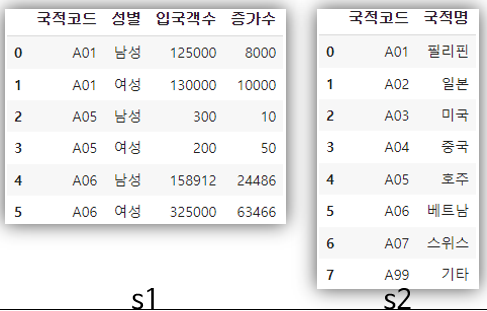

In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data/nation.xlsx'
path2 = '/content/drive/MyDrive/Colab Notebooks/Data/week13_data/code.xlsx'
s1 = pd.read_excel(path1)
s2 = pd.read_excel(path2)
s2

,국적코드,국적명
0,A01,필리핀
1,A02,일본
2,A03,미국
3,A04,중국
4,A05,호주
5,A06,베트남
6,A07,스위스
7,A99,기타


In [ ]:
# 공통컬럼을 기준으로 데이터 병합
nation = pd.merge(s1,s2,on='국적코드') #how = inner
nation

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [ ]:
# left 기준
pd.merge(s1,s2,how='left',on='국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [ ]:
# right 기준
pd.merge(s1,s2,how='right',on='국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000.0,8000.0,필리핀
1,A01,여성,130000.0,10000.0,필리핀
2,A02,NaN,NaN,NaN,일본
3,A03,NaN,NaN,NaN,미국
4,A04,NaN,NaN,NaN,중국
5,A05,남성,300.0,10.0,호주
6,A05,여성,200.0,50.0,호주
7,A06,남성,158912.0,24486.0,베트남
8,A06,여성,325000.0,63466.0,베트남
9,A07,NaN,NaN,NaN,스위스


In [ ]:
# 컬럼명이 다를 경우
# pd.merge(s1,s2,left_ind='국적코드',right_ind='코드')

In [ ]:
# 데이터 저장하기
# 파일경로 
# 인덱스 그대로 저장
filename = '/content/drive/MyDrive/Colab Notebooks/Data/sample1.xlsx'
nation.to_excel(filename)

In [ ]:
# 데이터 저장하기
filename = '/content/drive/MyDrive/Colab Notebooks/Data/sample2.xlsx'
nation.to_excel(filename,index=False)

## 데이터 그룹핑

In [ ]:
# 한 컬럼 기준 그룹화
s1.groupby('국적코드').sum()

,입국객수,증가수
국적코드,,
A01,255000,18000
A05,500,60
A06,483912,87952


In [ ]:
# 여러 컬럼 기준 그룹화
#국적코드별로 성별에 따라서
s1.groupby(['국적코드','성별']).sum()

입국객수    증가수
국적코드 성별               
A01  남성  125000   8000
     여성  130000  10000
A05  남성     300     10
     여성     200     50
A06  남성  158912  24486
     여성  325000  63466

# 실습문제
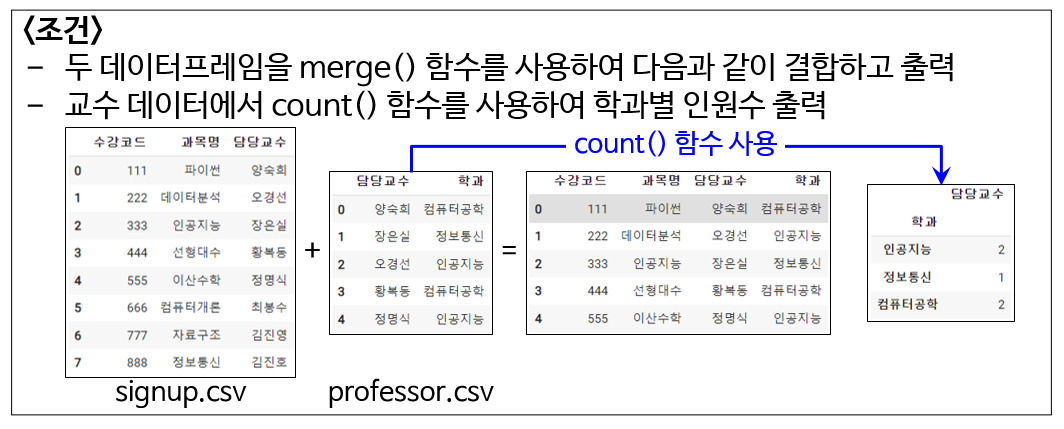

In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data/week13_data/professor.csv'
path2 ='/content/drive/MyDrive/Colab Notebooks/Data/week13_data/signup.csv'

data1 = pd.read_csv(path1,encoding='cp949')
data2 = pd.read_csv(path2,encoding='cp949')

In [ ]:
data2

,수강코드,과목명,담당교수
0,111,파이썬,양숙희
1,222,데이터분석,오경선
2,333,인공지능,장은실
3,444,선형대수,황복동
4,555,이산수학,정명식
5,666,컴퓨터개론,최봉수
6,777,자료구조,김진영
7,888,정보통신,김진호


In [ ]:
data1

,담당교수,학과
0,양숙희,컴퓨터공학
1,장은실,정보통신
2,오경선,인공지능
3,황복동,컴퓨터공학
4,정명식,인공지능


In [ ]:
# 데이터 병합
df = pd.merge(data1,data2,on='담당교수')
df = df[['수강코드','과목명','담당교수','학과']]
df = df.sort_values('수강코드')
df.head()

,수강코드,과목명,담당교수,학과
0,111,파이썬,양숙희,컴퓨터공학
2,222,데이터분석,오경선,인공지능
1,333,인공지능,장은실,정보통신
3,444,선형대수,황복동,컴퓨터공학
4,555,이산수학,정명식,인공지능


In [ ]:
group_data1=data1.groupby('학과')[['담당교수']].count()
group_data1

,담당교수
학과,
인공지능,2
정보통신,1
컴퓨터공학,2


# 응용문제1

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/week13_data/covid.csv'
# df=pd.read_csv(path,encoding = 'cp949') #데이터프레임 형식
df=pd.read_csv(path,index_col = '항목',encoding = 'cp949')

* 데이터 확인

In [ ]:
df

,사례수,증가,감소,변화없음
항목,,,,
스마트폰,999,78.9,1.7,19.4
텔레비전,965,68.5,3.9,27.6
개인용 PC,973,65.7,3.7,30.6
태블릿 PC,662,46.8,4.2,49.0
라디오,687,35.5,12.5,52.0
잡지·책,776,31.3,17.8,50.9
종이신문,552,17.6,23.2,59.2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_

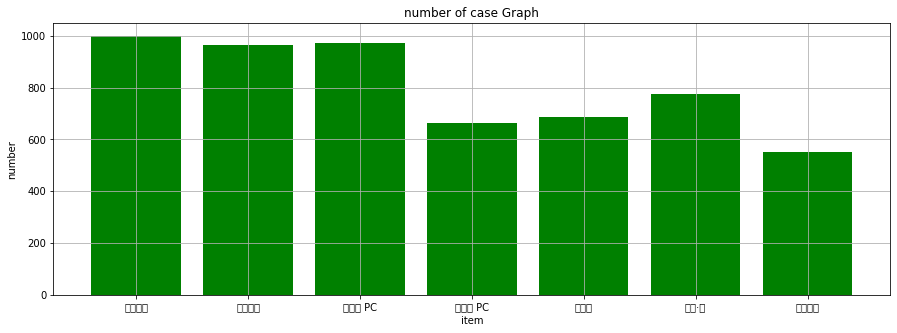

In [ ]:
import matplotlib.pyplot as plt
#그래프 크기
plt.figure(figsize=(15,5))
plt.title('number of case Graph')
case = df['사례수']
#막대그래프
plt.bar(case.index,case, color = 'g')
#X축 제목
plt.xlabel('item')
#Y축 제목
plt.ylabel('number')
plt.grid()
plt.show()

* 사례수가 가장 높은 항목의 모든 정보 출력

In [ ]:
w = df['사례수'] == df['사례수'].max()
df[w]

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4


* 증가율이 높은 3개의 항목 출력

In [ ]:
n = df.sort_values('증가',ascending = False)
n.head(3)

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6


# 응용문제2

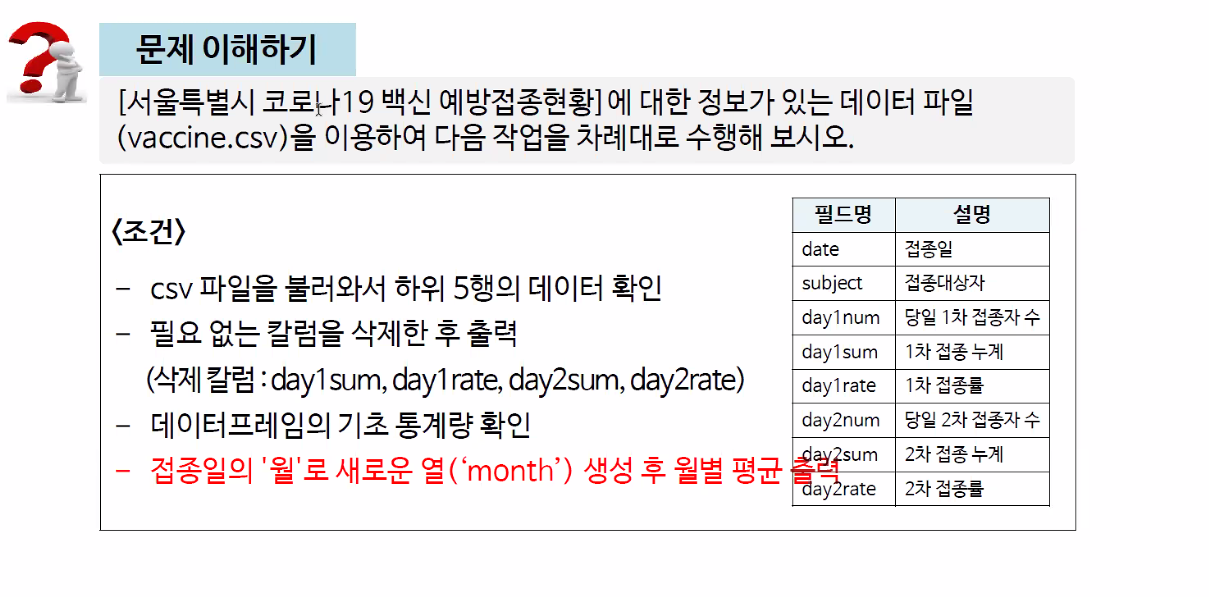

* 데이터확인

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/week13_data/vaccine.csv'
df = pd.read_csv(path)
df

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
0,2021.10.16,9505868,10673,7562283,79.6,66910,6191341,65.1
1,2021.10.15,9505868,14556,7551829,79.4,133580,6124432,64.4
2,2021.10.14,9505868,9609,7536654,79.3,94569,5989111,63.0
3,2021.10.13,9505868,9804,7526430,79.2,77503,5893191,62.0
4,2021.10.12,9505868,17274,7516070,79.1,110204,5814018,61.2
...,...,...,...,...,...,...,...,...
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6


* 필요없는 칼럼 삭제

In [ ]:
df.drop(['day1sum'],axis=1,inplace=True)
df.drop(['day1rate'],axis=1,inplace=True)
df.drop(['day2sum'],axis=1,inplace=True)
df.drop(['day2rate'],axis=1,inplace=True)

In [ ]:
df

,date,subject,day1num,day2num
0,2021.10.16,9505868,10673,66910
1,2021.10.15,9505868,14556,133580
2,2021.10.14,9505868,9609,94569
3,2021.10.13,9505868,9804,77503
4,2021.10.12,9505868,17274,110204
...,...,...,...,...
174,2021.04.25,1023346,23323,3411
175,2021.04.24,1023346,200,0
176,2021.04.23,1027740,10195,119
177,2021.04.22,1023538,27074,2479


* 데이터프레임의 기초 통계량 확인

In [ ]:
df.describe()

,subject,day1num,day2num
count,1.790000e+02,179.000000,179.000000
mean,5.086644e+06,40078.150838,34096.636872
std,3.324235e+06,44231.469656,40745.688278
min,1.019322e+06,0.000000,0.000000
25%,2.279241e+06,4385.000000,4794.500000
50%,3.943320e+06,23323.000000,16581.000000
75%,9.505868e+06,71634.500000,50950.000000
max,9.795426e+06,169036.000000,200186.000000


* 접종일의 '월'로 새로운 열(‘month’) 생성 후 월별 평균 출력

In [ ]:
df

,date,subject,day1num,day2num
0,2021.10.16,9505868,10673,66910
1,2021.10.15,9505868,14556,133580
2,2021.10.14,9505868,9609,94569
3,2021.10.13,9505868,9804,77503
4,2021.10.12,9505868,17274,110204
...,...,...,...,...
174,2021.04.25,1023346,23323,3411
175,2021.04.24,1023346,200,0
176,2021.04.23,1027740,10195,119
177,2021.04.22,1023538,27074,2479


In [ ]:
df.dtypes

date       object
subject     int64
day1num     int64
day2num     int64
dtype: object

In [ ]:
from datetime import datetime

* astype으로 바꾸기

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [ ]:
df

,date,subject,day1num,day2num
0,2021-10-16,9505868,10673,66910
1,2021-10-15,9505868,14556,133580
2,2021-10-14,9505868,9609,94569
3,2021-10-13,9505868,9804,77503
4,2021-10-12,9505868,17274,110204
...,...,...,...,...
174,2021-04-25,1023346,23323,3411
175,2021-04-24,1023346,200,0
176,2021-04-23,1027740,10195,119
177,2021-04-22,1023538,27074,2479


In [ ]:
df.dtypes

date       datetime64[ns]
subject             int64
day1num             int64
day2num             int64
dtype: object

In [ ]:
df['월'] = df['date'].dt.month

In [ ]:
df

,date,subject,day1num,day2num,월
0,2021-10-16,9505868,10673,66910,10
1,2021-10-15,9505868,14556,133580,10
2,2021-10-14,9505868,9609,94569,10
3,2021-10-13,9505868,9804,77503,10
4,2021-10-12,9505868,17274,110204,10
...,...,...,...,...,...
174,2021-04-25,1023346,23323,3411,4
175,2021-04-24,1023346,200,0,4
176,2021-04-23,1027740,10195,119,4
177,2021-04-22,1023538,27074,2479,4


In [ ]:
df.groupby('월').mean()

,subject,day1num,day2num
월,,,
4,1.054686e+06,22060.100000,2304.600000
5,1.289918e+06,18225.548387,9734.000000
6,3.167106e+06,55957.200000,20147.300000
7,3.819340e+06,25807.870968,9934.903226
8,6.702049e+06,57667.258065,55575.000000
9,9.556825e+06,65715.000000,62162.000000
10,9.505868e+06,9406.312500,79900.750000
